In [1]:
# import libs
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
tickers = ['PTTEP.BK', 'LANNA.BK', 'TIPH.BK']

In [3]:
interval = '1d'
start = '2008-8-1'
end = '2024-8-1'

stock = yf.Ticker(tickers[0])
stock_df = stock.history(interval='1d',start=start,end=end)

In [4]:
stock_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-08-01 00:00:00+07:00,74.478489,75.988190,74.478489,74.981720,5993686,0.0,0.0
2008-08-04 00:00:00+07:00,75.484962,76.491425,74.981723,75.484962,1712907,0.0,0.0
2008-08-05 00:00:00+07:00,74.478509,74.981741,70.955875,71.459114,13254996,0.0,0.0
2008-08-06 00:00:00+07:00,72.465557,73.975258,70.955856,72.968788,7215139,0.0,0.0
2008-08-07 00:00:00+07:00,72.968804,78.504372,71.962342,78.504372,13927231,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00+07:00,144.000000,144.500000,141.500000,143.000000,5941700,0.0,0.0
2024-07-25 00:00:00+07:00,142.500000,144.500000,142.000000,144.000000,4484300,0.0,0.0
2024-07-26 00:00:00+07:00,144.000000,147.000000,144.000000,147.000000,5149000,0.0,0.0


In [5]:
stock_df['rets'] = stock_df['Close'].pct_change()

In [6]:
set = pd.read_csv('./gmean-set.csv')

In [7]:
set['Month-Year'] = pd.to_datetime(set['Month-Year'])
set.set_index('Month-Year', inplace=True)

In [8]:
set = set[set.index.year >= 2008]

In [9]:
last_quarter = set.iloc[-1, -1]

In [10]:
a = np.array([False]*stock_df.shape[0])

for x in set[set['quarter'] == last_quarter].index:
    a |= (stock_df.index.year == x.year) & (stock_df.index.month == x.month)

In [11]:
stock_df[a].index[0] + pd.DateOffset(months=4)

Timestamp('2009-01-01 00:00:00+0700', tz='Asia/Bangkok')

In [23]:
all_returns = []
for date in stock_df[a].index:
    ret = stock_df.loc[date: date + pd.DateOffset(months=4)]['rets'].tolist()
    all_returns.extend(ret)

In [26]:
m = 100000 # number of paths
d = 120
rearrange_return = np.random.choice(all_returns, size= (m, d), replace=True)
portfolios = np.exp(np.cumprod(rearrange_return + 1, axis=1))

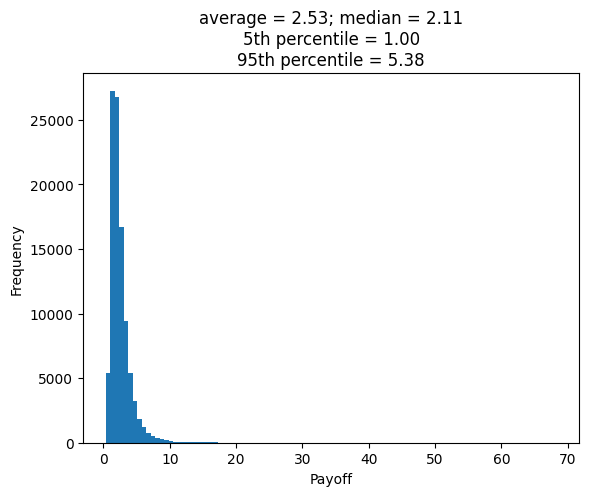

In [28]:
final_portfolios = portfolios[:, -1] - 1

med = np.median(final_portfolios)
avg = np.average(final_portfolios)
per_5 = np.percentile(np.sort(final_portfolios), 5)
per_95 = np.percentile(np.sort(final_portfolios), 95)
plt.title(f'average = {avg:.2f}; median = {med:.2f}\n5th percentile = {per_5:.2f}\n95th percentile = {per_95:.2f}')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.hist(final_portfolios, 100);